# Business Case: Inventory management.
Keeping Inventory of spare in various service centre to the market
demand is always a challenge as most service centres spends significant
amount in spare parts inventory costs. In spite of this,
availability of spare parts is been one of the problem areas.

## Project Goal:
Create Predictive model for inventory forecasting so that service centre achieve JIT standards.

## Contents

- [Import Stuff](#import-stuff)
- [Load the Data](#load-the-data)
- [Basic EDA](#basic-eda)
- [Data Preprocessing](#data-preprocessing)
- [Advanced EDA](#advanced-eda)
- [Time Series Analysis](#time-series-analysis)
- [Time Series Forecasting](#time-series-forecasting)
- [Model Evaluation](#models-evaluation)


## Import Stuff

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## Load the Data

In [ ]:
# loading data
data = pd.read_csv("inventory1.scv.csv")

In [ ]:
# size of data
data.shape


(13058, 7)

In [ ]:
# getting first 10 records
data.head(10)

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,30-05-22,30-05-22,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000.0,ENGINE OIL
1,02-06-22,31-05-22,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,ENGINE OIL
2,02-06-22,31-05-22,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,POLISH
3,02-06-22,31-05-22,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CONSUMABLES
4,02-06-22,31-05-22,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,COOLANT OIL
5,02-06-22,31-05-22,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,CHAIN LUBRICATION
6,02-06-22,31-05-22,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758.0,4 WAY SWITCH
7,31-05-22,31-05-22,pattXXXXXXXXXX,KA53EMXXXX,BAJAJ PLATINA,3717.0,ENGINE OIL
8,31-05-22,31-05-22,pattXXXXXXXXXX,KA53EMXXXX,BAJAJ PLATINA,3717.0,3M OIL
9,31-05-22,31-05-22,pattXXXXXXXXXX,KA53EMXXXX,BAJAJ PLATINA,3717.0,CHAIN LUBRICATION


## Basic EDA

In [ ]:
# columns
data.columns

Index(['invoice_date', 'job_card_date', 'business_partner_name', 'vehicle_no',
       'vehicle_model', 'current_km_reading', 'invoice_line_text'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13058 entries, 0 to 13057
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   invoice_date           13058 non-null  object 
 1   job_card_date          13057 non-null  object 
 2   business_partner_name  13057 non-null  object 
 3   vehicle_no             13057 non-null  object 
 4   vehicle_model          13057 non-null  object 
 5   current_km_reading     13057 non-null  float64
 6   invoice_line_text      13031 non-null  object 
dtypes: float64(1), object(6)
memory usage: 714.2+ KB


Few null values are there in 'invoice_line_text'

In [ ]:
# Handling nulls
data.isnull().sum()

invoice_date              0
job_card_date             1
business_partner_name     1
vehicle_no                1
vehicle_model             1
current_km_reading        1
invoice_line_text        27
dtype: int64

In [ ]:
100* data.isnull().sum()/data.shape[0]

invoice_date             0.000000
job_card_date            0.007658
business_partner_name    0.007658
vehicle_no               0.007658
vehicle_model            0.007658
current_km_reading       0.007658
invoice_line_text        0.206770
dtype: float64

0.12% records of invoice_line_text are nulls => dropping those rows

In [ ]:
data = data[pd.notnull(data.invoice_line_text)].reset_index(drop=True)
data.head()

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,30-05-22,30-05-22,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,02-06-22,31-05-22,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,02-06-22,31-05-22,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,02-06-22,31-05-22,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,02-06-22,31-05-22,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL


In [ ]:
data.shape

(28448, 7)

In [ ]:
# Handling outliers

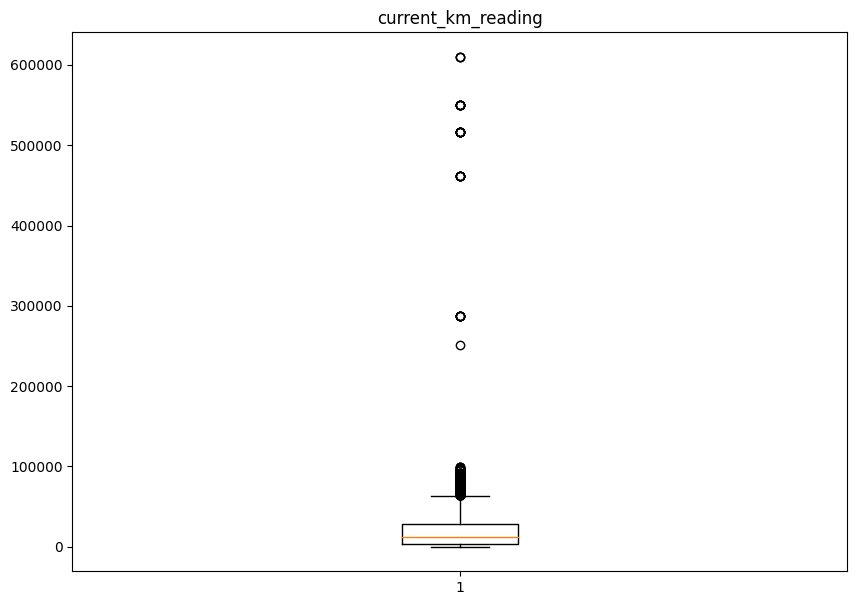

In [ ]:
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(data.current_km_reading)
plt.title("current_km_reading")
# show plot
plt.show()

**Note**: Normally bikes can't exceed 100,000 km.

In [ ]:
data[data.current_km_reading > 100000].shape[0]

35

In [ ]:
# removing outliers
data = data[data.current_km_reading <= 100000].reset_index(drop=True)
data.shape

(28413, 7)

In [ ]:
data.head()

,invoice_date,job_card_date,business_partner_name,vehicle_no,vehicle_model,current_km_reading,invoice_line_text
0,30-05-22,30-05-22,shivXXXXXXXXXX,KA03MFXXXX,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,02-06-22,31-05-22,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,ENGINE OIL
2,02-06-22,31-05-22,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,POLISH
3,02-06-22,31-05-22,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,CONSUMABLES
4,02-06-22,31-05-22,KIRAXXXXXXXXXX,KA53ESXXXX,BAJAJ PULSAR NS 200,758,COOLANT OIL


In [ ]:
data.columns

Index(['invoice_date', 'job_card_date', 'business_partner_name', 'vehicle_no',
       'vehicle_model', 'current_km_reading', 'invoice_line_text'],
      dtype='object')

In [ ]:
# dropping redundant columns ['invoice_date','job_card_date',  'business_partner_name', 'vehicle_no']
data = data[['job_card_date', 'vehicle_model', 'invoice_line_text']]
data.shape

(28413, 3)

In [ ]:
grouped_data = data.groupby(['vehicle_model'])['invoice_line_text'].count().reset_index()
grouped_data.rename(columns={'invoice_line_text': 'count'}, inplace=True)
grouped_data = grouped_data.sort_values(by='count', ascending=False)
grouped_data

,vehicle_model,count
12,BAJAJ PULSAR 150,8599
2,BAJAJ AVENGER STREET 220,4212
14,BAJAJ PULSAR 220,2654
13,BAJAJ PULSAR 180,2251
18,BAJAJ PULSAR NS 200,2203
5,BAJAJ CT 100,1432
7,BAJAJ DISCOVER 125,1345
0,BAJAJ AVENGER STREET,1111
11,BAJAJ PLATINA,843
23,BAJAJ V150,685


In [ ]:
grouped_data = data.groupby(['invoice_line_text'])['vehicle_model'].count().reset_index()
grouped_data.rename(columns={'vehicle_model': 'count'}, inplace=True)
grouped_data = grouped_data.sort_values(by='count', ascending=False)
grouped_data

,invoice_line_text,count
148,ENGINE OIL,3799
76,CHAIN LUBRICATION,3437
209,GENERAL SERVICE,2136
10,AIR FILTER,1713
2,3M OIL,1628
...,...,...
369,RIM,1
370,RIM TUBLESS NECK,1
205,GEAR LEVER WELDING,1
203,GEAR LEVER OIL SEAL,1


In [ ]:
data['invoice_line_text'].nunique()

502

In [ ]:
# printing all items from invoice_line_text
for item in data.invoice_line_text.unique():
    print(f"'{item}',")

'ENGINE OIL',
'POLISH',
'CONSUMABLES',
'COOLANT OIL',
'CHAIN LUBRICATION',
'4 WAY SWITCH',
'3M OIL',
'GENERAL SERVICE',
'OIL FILTER',
'INDICATOR',
'HEAD REST',
'VALVE GUIDE',
'TIMMING CHAIN',
'FOOT REST',
'LOW BEAM BULB',
'VALVE GRAINDING',
'DISC PAD',
'LOADING GEAR',
'PACKING KIT',
'TIMMING CHAIN PAD',
'TENSIONER',
'CLUTCH BELL REST',
'CLUTCH ASSEMBLY',
'VALVE KIT',
'SPARK PLUG',
'ONE WAY CLUTCH',
'BORE KIT',
'AIR FILTER',
'HEAD RUBBER',
'CLUTCH CABLE',
'CRANK SHAFT',
'BRAKE ADJUSTMENT',
'BRAKE SHOE',
'AIR FILTER CHECKUP',
'DRUM BOLT WASHER',
'TANK CLEANING',
'FORK BEND',
'GEAR SHAFT',
'CLUTCH COVER GASKET',
'INDICATOR BULB',
'GEAR LEVER',
'HANDLEBAR',
'CRASH GUARD',
'FORK OIL SEAL',
'FORK OIL',
'SIDE SHIELD',
'VISIOR',
'FORK CONE SET',
'HEAD LIGHT DOOM',
'TANK ASSEMBLY',
'Clutch cable',
'DISC LEVER',
'CARBURETOR CLEANING',
'SEAT COVER',
'BUZZER',
'TAIL LAMP BULB',
'DISC OIL',
'DISC OVERHUAL',
'MASTER ASSEMBLY',
'CHAIN COVER RUBBER',
'ENGINE GUARD',
'CLUTCH CAM ',
'DOOM',
'WHEEL RUBBE

## Data Preprocessing

In [ ]:
# data cleaning
data['invoice_line_text'] = data['invoice_line_text'].str.replace('BULB ', 'BULB')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('OVERHUAL', 'OVERHAUL')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('WIELDING', 'WELDING')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('ENGINE OIL TOPUP', 'ENGINE OIL')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('ASSEBLY', 'ASSEMBLY')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('GRIP HANDLE', 'HANDLE GRIPPER')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('HANDLEBAR', 'HANDLE BAR')
data['invoice_line_text'] = data['invoice_line_text'].str.replace('NUMBER PLATE WITH STICKERS', 'NUMBER PLATE')



In [ ]:
service_related_tokens = [
'OVERHAUL',
'WELDING',
'SERVICE',
'WORK',
'PUNCHER',
'REBORE',
'DENT',
'RC CARD',
'TAX',
'ENGINE WORK',
'CHECK',
'LABOUR',
'CHARGE',
'FEES',
'PAYMENT',
'STICKERS'
'ADJUSTMENT',
'REGISTOR',
'INSURANCE',
'ADJUSTMENT',
'REMOVAL',
'THREADING',
'CLEANING',
]
services = []
for item in data.invoice_line_text.unique():
    try:
        if sum([item.find(token)!= -1 for token in service_related_tokens]) > 0:
            services.append(item)
    except:
        print(item)

need_to_be_removed_in_services = [
'PETROL',
'VALVE GRAINDING',
'CHAIN LUBRICATION',
'ENGINE RE CONDITION',
'HEAD LIGHT WIRING',
'EX SHOW ROOM'
]
services.extend(need_to_be_removed_in_services)

In [ ]:
len(services)

67

In [ ]:
for item in data.invoice_line_text.unique():
#      if item not in services and item.find('EX SHOW ROOM')!=-1:
    if item not in services:
        print(item)
#         print(f"'{item}',")

ENGINE OIL
POLISH
CONSUMABLES
COOLANT OIL
4 WAY SWITCH
3M OIL
OIL FILTER
INDICATOR
HEAD REST
VALVE GUIDE
TIMMING CHAIN
FOOT REST
LOW BEAM BULB
DISC PAD
LOADING GEAR
PACKING KIT
TIMMING CHAIN PAD
TENSIONER
CLUTCH BELL REST
CLUTCH ASSEMBLY
VALVE KIT
SPARK PLUG
ONE WAY CLUTCH
BORE KIT
AIR FILTER
HEAD RUBBER
CLUTCH CABLE
CRANK SHAFT
BRAKE SHOE
DRUM BOLT WASHER
FORK BEND
GEAR SHAFT
CLUTCH COVER GASKET
INDICATOR BULB
GEAR LEVER
HANDLE BAR
CRASH GUARD
FORK OIL SEAL
FORK OIL
SIDE SHIELD
VISIOR
FORK CONE SET
HEAD LIGHT DOOM
TANK ASSEMBLY
Clutch cable
DISC LEVER
SEAT COVER
BUZZER
TAIL LAMP BULB
DISC OIL
MASTER ASSEMBLY
CHAIN COVER RUBBER
ENGINE GUARD
CLUTCH CAM 
DOOM
WHEEL RUBBER
bore kit
ENGINE BEARING
CRANK RESET
CARBURETOR DIAPHRAGM RUBBER
CLUTCH LEVER
DRUM BOLT
LOCK SET
RIGHT SHIELD CAP
SWITCH
SHOCK ABSORBER
STEP HOLDER
ACCELATOR CABLE
JALL SCREW
TANK COVER
HANDLE LOCK
GRIPPER
PARKING BULB
WIND SHIELD
SPEEDOMETER CAP
HEAD LIGHT STAY
CONE SET
DOOM SCREW KIT
DISK PAD
HEAD LIGHT BULB
CALIPER AS

In [ ]:
# dropping rows related to services
data = data[~data.invoice_line_text.isin(services)]
data = data.reset_index(drop=True)
data.shape

(21298, 3)

In [ ]:
data.head()

,job_card_date,vehicle_model,invoice_line_text
0,30-05-22,BAJAJ AVENGER STREET 220,ENGINE OIL
1,31-05-22,BAJAJ PULSAR NS 200,ENGINE OIL
2,31-05-22,BAJAJ PULSAR NS 200,POLISH
3,31-05-22,BAJAJ PULSAR NS 200,CONSUMABLES
4,31-05-22,BAJAJ PULSAR NS 200,COOLANT OIL


In [ ]:
# renaming some columns
data.rename(columns={"job_card_date":"date", "invoice_line_text":"spare_part"}, inplace=True)

In [ ]:
# changing object to datetime datatype
data['date'] = pd.to_datetime(data['date'], format='%d-%m-%y')

In [ ]:
data.head()

,date,vehicle_model,spare_part
0,2022-05-30,BAJAJ AVENGER STREET 220,ENGINE OIL
1,2022-05-31,BAJAJ PULSAR NS 200,ENGINE OIL
2,2022-05-31,BAJAJ PULSAR NS 200,POLISH
3,2022-05-31,BAJAJ PULSAR NS 200,CONSUMABLES
4,2022-05-31,BAJAJ PULSAR NS 200,COOLANT OIL


## Advanced EDA

In [ ]:
# Calculate the counts of unique elements of invoice_line_text
value_counts = data['spare_part'].value_counts()

# Display the value counts
print(value_counts)


spare_part
ENGINE OIL              3804
AIR FILTER              1713
3M OIL                  1628
CONSUMABLES             1595
POLISH                  1245
                        ... 
REGISTER EXPENSES          1
SWITCH                     1
MAGNET COVER PACKING       1
CLUTCH OUTLET PIPE         1
HELMET                     1
Name: count, Length: 431, dtype: int64


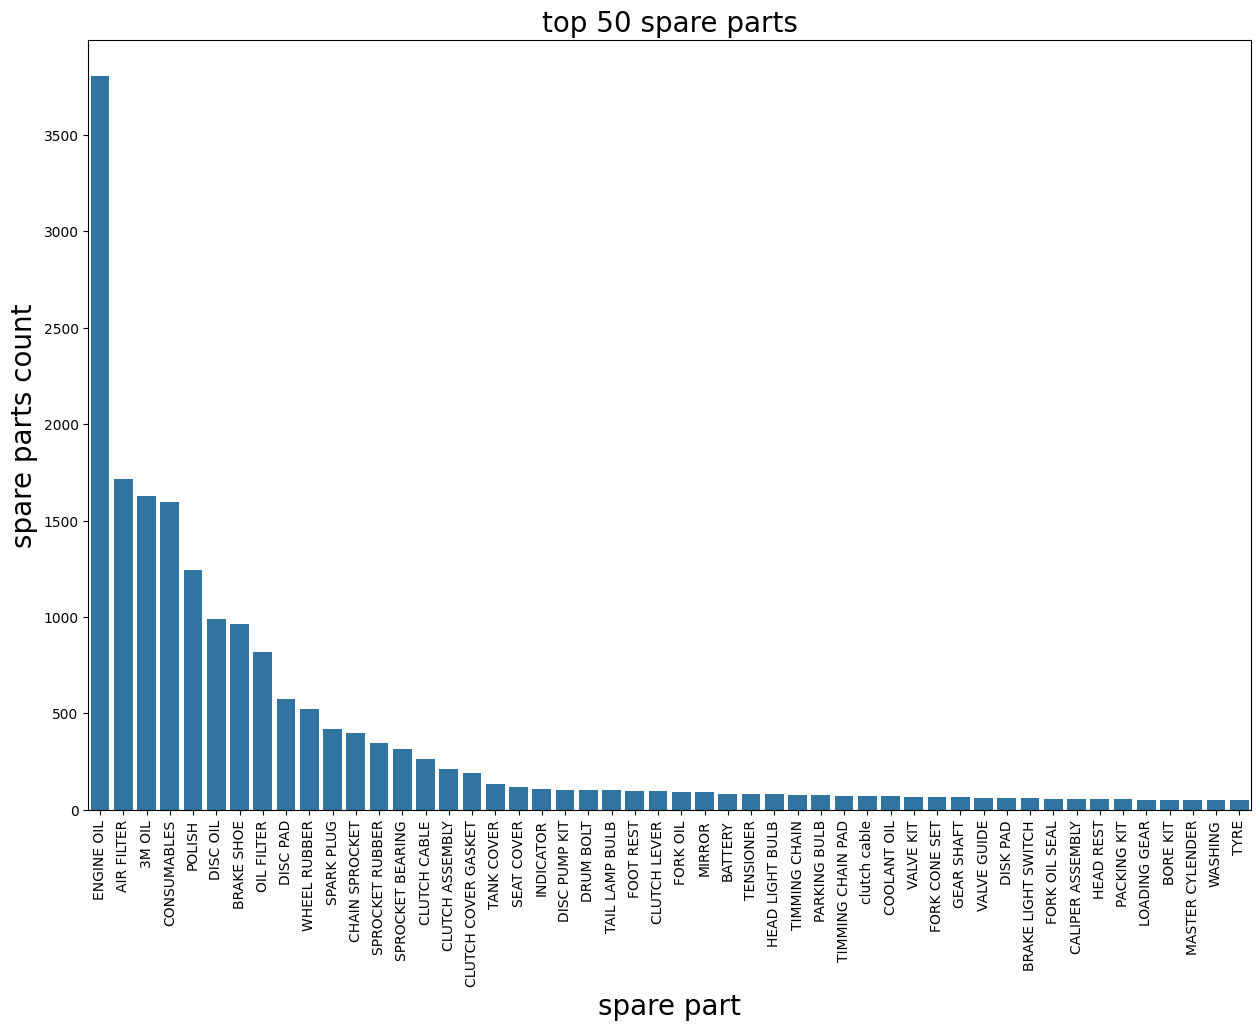

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 10))

# Create the countplot
sns.countplot(data=data, x='spare_part',
              order=data['spare_part'].value_counts().index[:50],
              ax=ax)

# Set titles and labels with customized fontsizes
ax.set_title('top 50 spare parts', fontsize=20)
ax.set_ylabel('spare parts count', fontsize=20)
ax.set_xlabel('spare part', fontsize=20)

# Rotate x-axis labels
ax.tick_params(axis='x', rotation=90)

# Show the plot
plt.show()


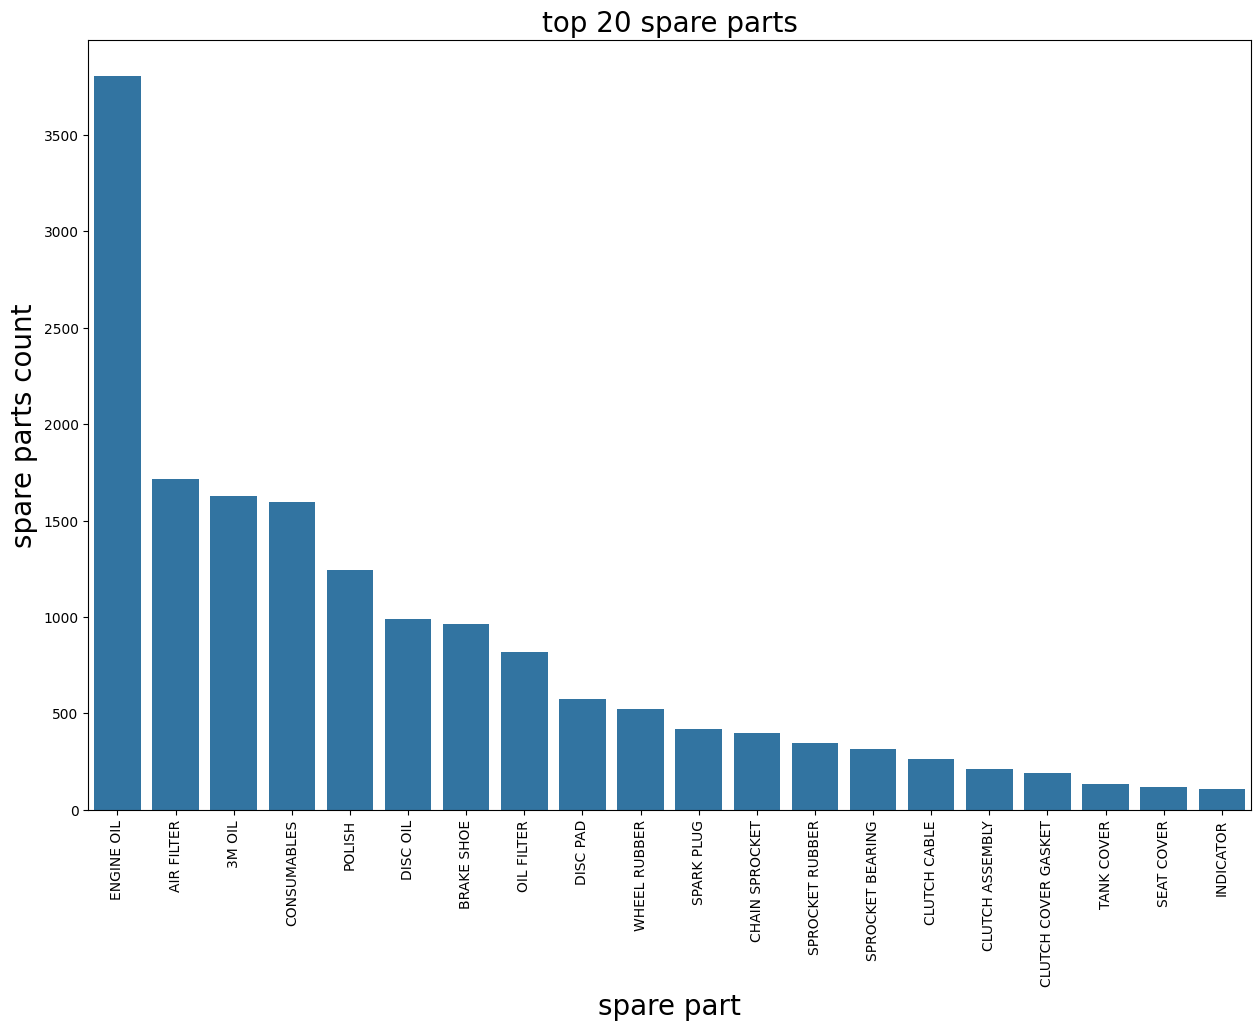

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 10))

# Create the countplot
sns.countplot(data=data, x='spare_part',
              order=data['spare_part'].value_counts().index[:20],
              ax=ax)

# Set titles and labels with customized fontsizes
ax.set_title('top 20 spare parts', fontsize=20)
ax.set_ylabel('spare parts count', fontsize=20)
ax.set_xlabel('spare part', fontsize=20)

# Rotate x-axis labels
ax.tick_params(axis='x', rotation=90)

# Show the plot
plt.show()


In [ ]:
# grouping by vehicle_model

vm_grouped_data = data.groupby(['vehicle_model'])['spare_part'].count().reset_index()
vm_grouped_data.rename(columns={'spare_part': 'count'}, inplace=True)
vm_grouped_data = vm_grouped_data.sort_values(by='count', ascending=False)
vm_grouped_data

,vehicle_model,count
12,BAJAJ PULSAR 150,6480
2,BAJAJ AVENGER STREET 220,3058
14,BAJAJ PULSAR 220,1984
18,BAJAJ PULSAR NS 200,1705
13,BAJAJ PULSAR 180,1703
5,BAJAJ CT 100,1119
7,BAJAJ DISCOVER 125,1027
0,BAJAJ AVENGER STREET,767
11,BAJAJ PLATINA,661
23,BAJAJ V150,523


In [ ]:
# grouping by spare part
sp_grouped_data = data.groupby(['spare_part'])['vehicle_model'].count().reset_index()
sp_grouped_data.rename(columns={'vehicle_model': 'count'}, inplace=True)
sp_grouped_data = sp_grouped_data.sort_values(by='count', ascending=False)
sp_grouped_data

,spare_part,count
127,ENGINE OIL,3804
9,AIR FILTER,1713
2,3M OIL,1628
90,CONSUMABLES,1595
298,POLISH,1245
...,...,...
232,LEVER BOLT,1
233,LEVER RUBBER,1
236,LIGHTING COIL,1
243,MAGNET ASSEMBLY,1


In [ ]:
data.date.nunique()

553

In [ ]:
sp_grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 431 entries, 127 to 430
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   spare_part  431 non-null    object
 1   count       431 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


In [ ]:
sp_grouped_data.shape[0]

431

In [ ]:
sp_grouped_data[sp_grouped_data['count']>1].shape[0]

288

In [ ]:
sp_grouped_data[sp_grouped_data['count']>10].shape[0]

128

In [ ]:
sp_grouped_data[sp_grouped_data['count']>=100].shape[0]

23

In [ ]:
# setting date as index column
data_indexed = data.set_index('date')
data_indexed.head()

,vehicle_model,spare_part
date,,
2022-05-30,BAJAJ AVENGER STREET 220,ENGINE OIL
2022-05-31,BAJAJ PULSAR NS 200,ENGINE OIL
2022-05-31,BAJAJ PULSAR NS 200,POLISH
2022-05-31,BAJAJ PULSAR NS 200,CONSUMABLES
2022-05-31,BAJAJ PULSAR NS 200,COOLANT OIL


In [ ]:
# resampling
weekly_data_indexed = data_indexed[['spare_part']].resample('W').count()
weekly_data_indexed.shape

(84, 1)

In [ ]:
weekly_data_indexed.head()

,spare_part
date,
2022-06-05,176
2022-06-12,209
2022-06-19,235
2022-06-26,252
2022-07-03,164


<Figure size 1500x1000 with 0 Axes>

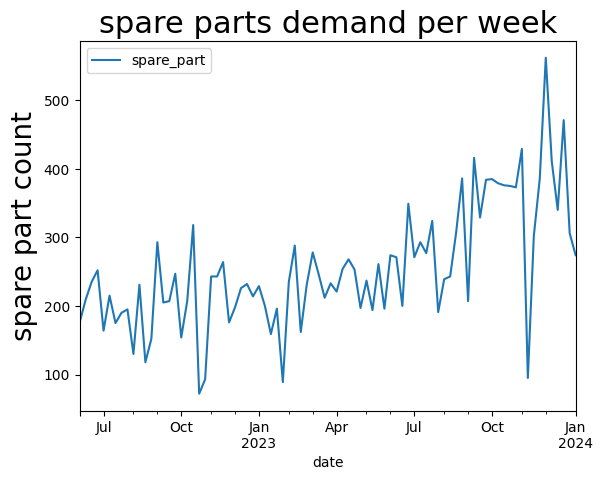

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Plot the weekly data
weekly_data_indexed.plot()

# Set the title and labels with customized fontsizes
plt.title('spare parts demand per week', fontsize=22)
plt.ylabel('spare part count', fontsize=20)

# Show the plot
plt.show()


## Time Series Analysis

Analyzing the spare parts demand over time.

I will be exploring following statistical techniques over the above data to understand overall pattern and behaviour of the inventory data.

- Time Downsampling
- Moving Average with rolling window
- Cummulative mean with expanding window
- Exponential Weighted Moving Average
- Time series stationarity

### Time Downsampling

In above steps, I resampled the data on weekly level. Let's see the demand of spare parts on monthly level.

In [ ]:
monthly_data_indexed = weekly_data_indexed.resample('M').sum()

monthly_data_indexed.head()

,spare_part
date,
2022-06-30,872
2022-07-31,939
2022-08-31,631
2022-09-30,952
2022-10-31,844


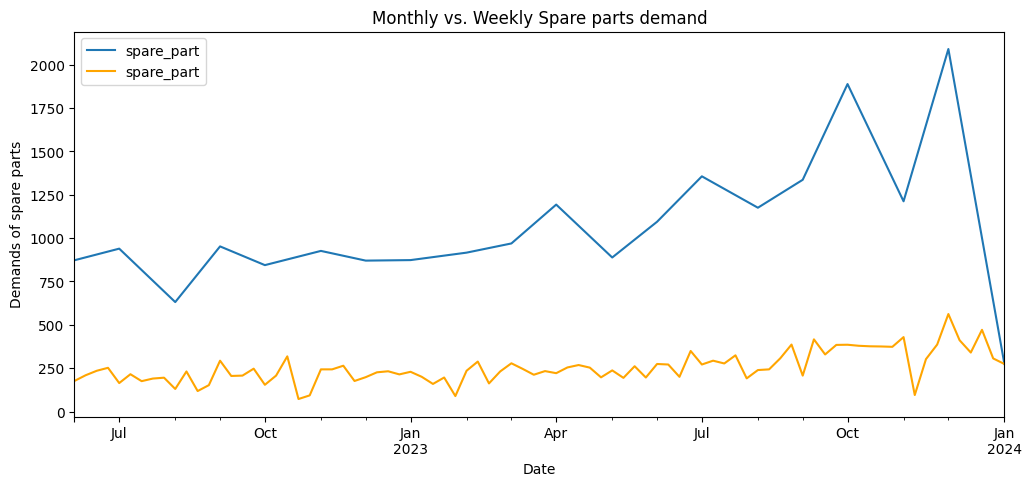

In [ ]:
#plot the weekly demand and monthly demand on same view

fig, ax = plt.subplots(figsize=(12, 5))
# Plot the down sampled
monthly_data_indexed.plot(ax=ax, label='Monthly Demand')

# Plot the upsampled data
weekly_data_indexed.plot(ax=ax, label='Weekly Demand', color='orange')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Demands of spare parts')
ax.set_title('Monthly vs. Weekly Spare parts demand')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

The monthly demands seems less fluctuating.

### Moving Average rolling window

Let's apply some smoothing techniques to understand overall behaviour the data.

In [ ]:
weekly_data_indexed.columns

Index(['spare_part'], dtype='object')

In [ ]:
#define window size of 4 weeks -> Monthly window
window = 4
weekly_data_indexed['4W_MA'] = weekly_data_indexed['spare_part'].rolling(window).mean()


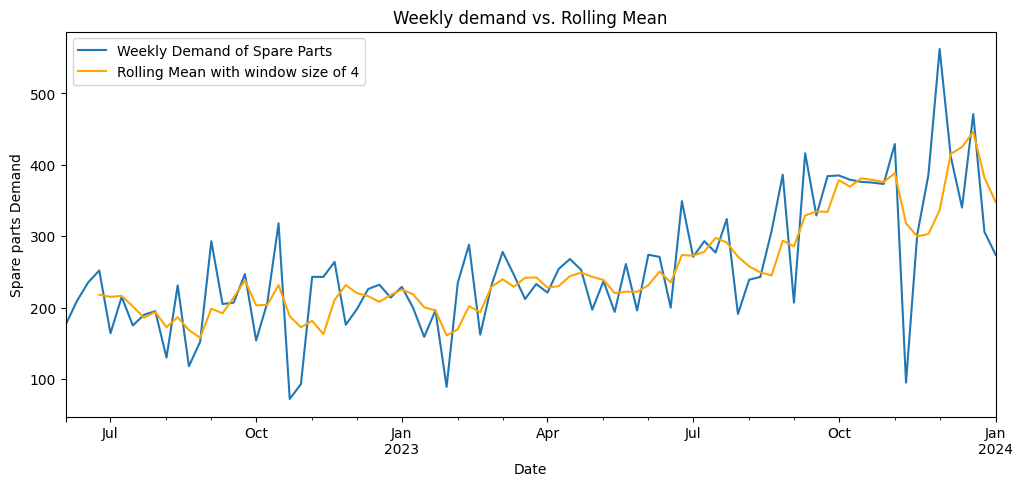

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
# weekly demand
weekly_data_indexed['spare_part'].plot(ax=ax, label='Weekly Demand of Spare Parts')

# MA with window size 4
weekly_data_indexed['4W_MA'].plot(ax=ax, label='Rolling Mean with window size of 4', color='orange')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Spare parts Demand')
ax.set_title('Weekly demand vs. Rolling Mean')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')
plt.show()

### Cumulative mean with expanding window

This can be helpful for understanding trends and pattern in the data over time.

In [ ]:
#append cummulative mean over min period = 4 weeks
weekly_data_indexed['4W_CM'] = weekly_data_indexed['spare_part'].expanding(min_periods=4).mean()
weekly_data_indexed.head(10)

,spare_part,4W_MA,4W_CM
date,,,
2022-06-05,176,NaN,NaN
2022-06-12,209,NaN,NaN
2022-06-19,235,NaN,NaN
2022-06-26,252,218.00,218.000000
2022-07-03,164,215.00,207.200000
2022-07-10,215,216.50,208.500000
2022-07-17,175,201.50,203.714286
2022-07-24,190,186.00,202.000000
2022-07-31,195,193.75,201.222222


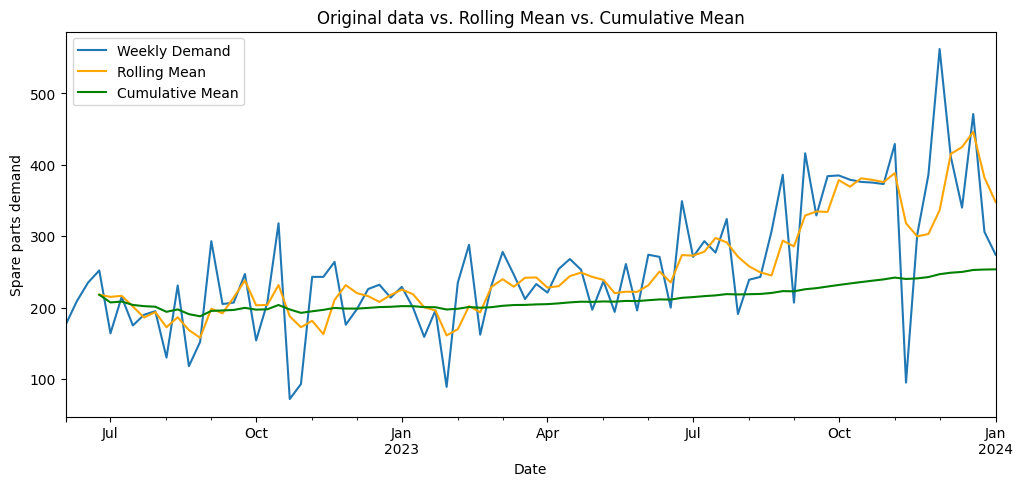

In [ ]:
#plot the final df
fig, ax = plt.subplots(figsize=(12, 5))

# Plot the data
weekly_data_indexed['spare_part'].plot(ax=ax, label='Weekly Demand')

# Plot the rolling mean
weekly_data_indexed['4W_MA'].plot(ax=ax, label='Rolling Mean', color='orange')

# Plot the  cumulative mean
weekly_data_indexed['4W_CM'].plot(ax=ax, label='Cumulative Mean', color='green')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Spare parts demand')
ax.set_title('Original data vs. Rolling Mean vs. Cumulative Mean')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')
plt.show()


Cumulative means seems somewhat stationary over time. But we need to investigate more.

### Time Series Stationarity

A time series is stationary if the mean and variance are fixed between two equidistance points.

Most the models like ARIMA and it's submodels need the stationary time series data.

Let's check if our data has some trend/seasonality or it is stationary. For stationarity check we can conduct augmented dickey fuller test.


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
print('Augmented Dickey-Fuller Test on Airline Data')
dftest = adfuller(weekly_data_indexed['spare_part'], autolag='AIC')

#covert into dataframe
dfout = pd.Series(dftest[0:4], index=['ADF test statistic','p-value','# lags used','# observations'])


for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

Augmented Dickey-Fuller Test on Airline Data
ADF test statistic      -2.389859
p-value                  0.144619
# lags used              2.000000
# observations          81.000000
critical value (1%)     -3.513790
critical value (5%)     -2.897943
critical value (10%)    -2.586191
dtype: float64


Here we have a very high p-value at 0.68, which provides weak evidence against the null hypothesis, and so we <em>fail to reject</em> the null hypothesis, and decide that our dataset is not stationary.

#### Differencing

**Let's trying to make the series stationary**

We can use first order of differencing to make it stationary.

In [ ]:
from statsmodels.tsa.statespace.tools import diff

weekly_data_indexed['spare_part_diff'] = diff(weekly_data_indexed['spare_part'], k_diff=1)

weekly_data_indexed.head(5)

,spare_part,4W_MA,4W_CM,spare_part_diff
date,,,,
2022-06-05,176,NaN,NaN,NaN
2022-06-12,209,NaN,NaN,33.0
2022-06-19,235,NaN,NaN,26.0
2022-06-26,252,218.0,218.0,17.0
2022-07-03,164,215.0,207.2,-88.0


In [ ]:
weekly_data_indexed = weekly_data_indexed[['spare_part', 'spare_part_diff']]

In [ ]:
weekly_data_indexed.head()

,spare_part,spare_part_diff
date,,
2022-06-05,176,NaN
2022-06-12,209,33.0
2022-06-19,235,26.0
2022-06-26,252,17.0
2022-07-03,164,-88.0


<Axes: title={'center': 'First order differencing'}, xlabel='date'>

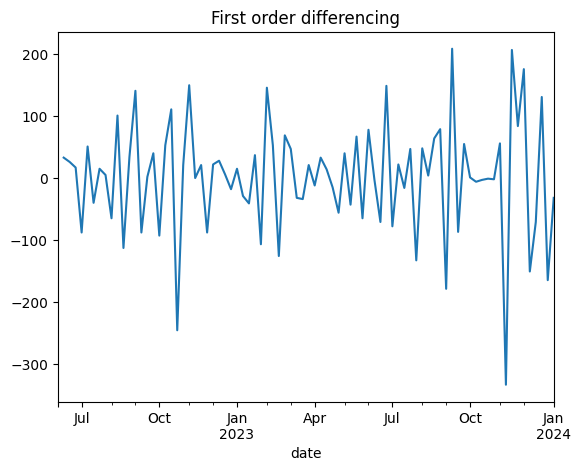

In [ ]:
weekly_data_indexed['spare_part_diff'].plot(title="First order differencing")

Now check for stationarity.

In [ ]:
#drop first NaN entry
weekly_data_indexed = weekly_data_indexed.dropna()

In [ ]:
print('Augmented Dickey-Fuller Test on Airline Data')
dftest = adfuller(weekly_data_indexed['spare_part_diff'], autolag='AIC')

#covert into dataframe
dfout = pd.Series(dftest[0:4], index=['ADF test statistic','p-value','# lags used','# observations'])


for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

Augmented Dickey-Fuller Test on Airline Data
ADF test statistic      -5.267973
p-value                  0.000006
# lags used              7.000000
# observations          75.000000
critical value (1%)     -3.520713
critical value (5%)     -2.900925
critical value (10%)    -2.587781
dtype: float64


After first order differencing, the series seems now stationarity. The resultant series has `p-value` less than `5%`.

## Time Series Forecasting

Since we are done with Analysis of our data. We also checked for stationarity and then we introduced first order differencing to make the time series stationary.

We can now move ahead for modeling and forecasting for future dates.

We have a lot of options while doing model selection like we can use Auto Regression(AR), Autoregressive Moving Average(ARMA) or Autoregressive Integreted Moving Average(ARIMA).

For time being I am using Triple Exponential Smoothing for setting the base line and the SARIMA model to get better result.



### Train/Test Split

For evaluating the model's performance it is crucial to evaluate it on unseen data. We can divide our data into train and test part. We can use train part for model's tranining and test part for model evaluation.

I am dividing the whole data into test and train such that test data has last 16 weeks points i.e last 2 months.

In [ ]:
X = weekly_data_indexed

# Calculate the split point based on an 80:20 ratio
split_point = 16

# Split the data into train and test sets
train_data = X[:-split_point]
test_data = X[-split_point:]

# print the lengths of the train and test sets
print('Train data length:', len(train_data))
print('Test data length:', len(test_data))


Train data length: 67
Test data length: 16


### Forecasting with Holt's-Winter method


This method is another name of Triple Exponential Smoothing. It takes seasonality into account. When we expect regular fluctuations in the future, this model attempts to map the seasonal behavior.

#### Fitting the model

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['spare_part'], trend='mul', seasonal='add', seasonal_periods=26).fit()


### Evaluating against test set


In [ ]:

test_predictions = fitted_model.forecast(len(test_data))

In [ ]:
test_predictions

2023-09-24    338.970240
2023-10-01    289.061334
2023-10-08    335.349051
2023-10-15    402.284688
2023-10-22    272.859049
2023-10-29    258.654474
2023-11-05    357.761334
2023-11-12    340.301752
2023-11-19    387.672711
2023-11-26    314.572161
2023-12-03    367.483453
2023-12-10    383.385908
2023-12-17    373.503621
2023-12-24    430.335264
2023-12-31    381.355902
2024-01-07    401.392936
Freq: W-SUN, dtype: float64

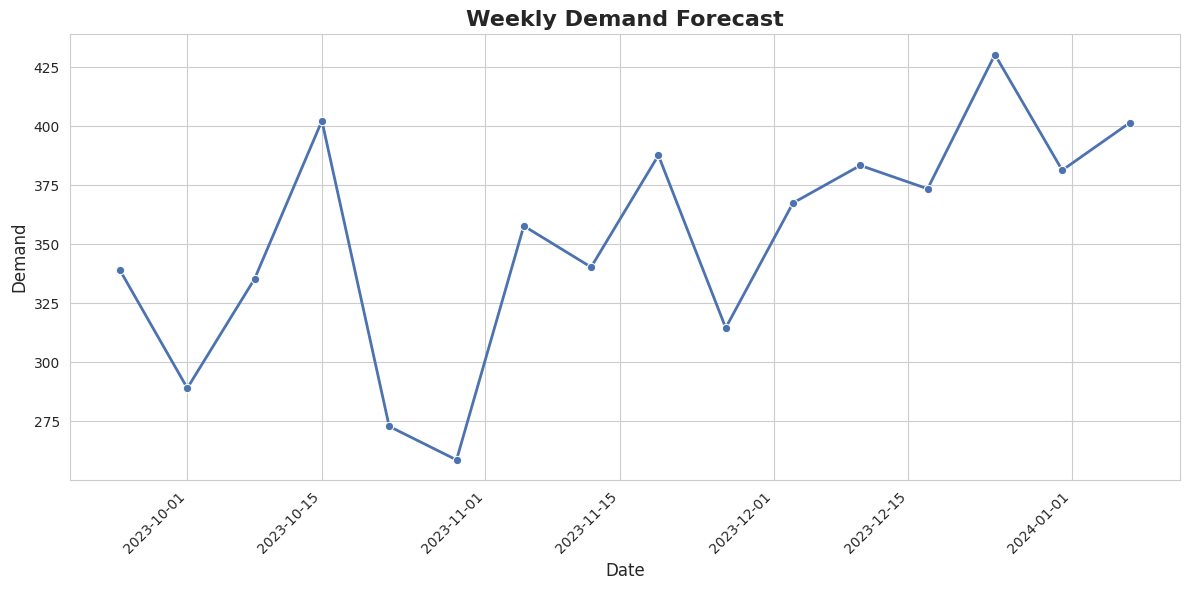

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame from the forecast data
data = {
    'date': ['2023-09-24', '2023-10-01', '2023-10-08', '2023-10-15', '2023-10-22',
             '2023-10-29', '2023-11-05', '2023-11-12', '2023-11-19', '2023-11-26',
             '2023-12-03', '2023-12-10', '2023-12-17', '2023-12-24', '2023-12-31',
             '2024-01-07'],
    'demand': [338.970240, 289.061334, 335.349051, 402.284688, 272.859049,
               258.654474, 357.761334, 340.301752, 387.672711, 314.572161,
               367.483453, 383.385908, 373.503621, 430.335264, 381.355902,
               401.392936]
}

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])

# Set up the plot style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_palette("deep")

# Create the line plot
sns.lineplot(x='date', y='demand', data=df, linewidth=2, marker='o')

# Customize the plot
plt.title('Weekly Demand Forecast', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Demand', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Improve the layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter, MonthLocator

# Load the CSV file
df = pd.read_csv('inventory1.scv.csv', parse_dates=['invoice_date'], index_col='invoice_date')

# Ensure the data is sorted by date
df = df.sort_index()

# If 'spare_part' is the column name for demand, use it; otherwise, replace with the correct column name
demand_column = 'spare_part'

#### Plot test and train data

### Plot Actual vs Predicted values

 I need my graph should be very specific and I wnat the graph to show the demadn forecast of the next 16 weeks , of each day sales data adnd label it asa bunch into a month , to give a rough ideaI want my grapgh to be continoous for all days of the next 16 weeks data , and after each month's end , it should be grouped as a month in the graph , the graph should be audience appealing

<Axes: xlabel='date'>

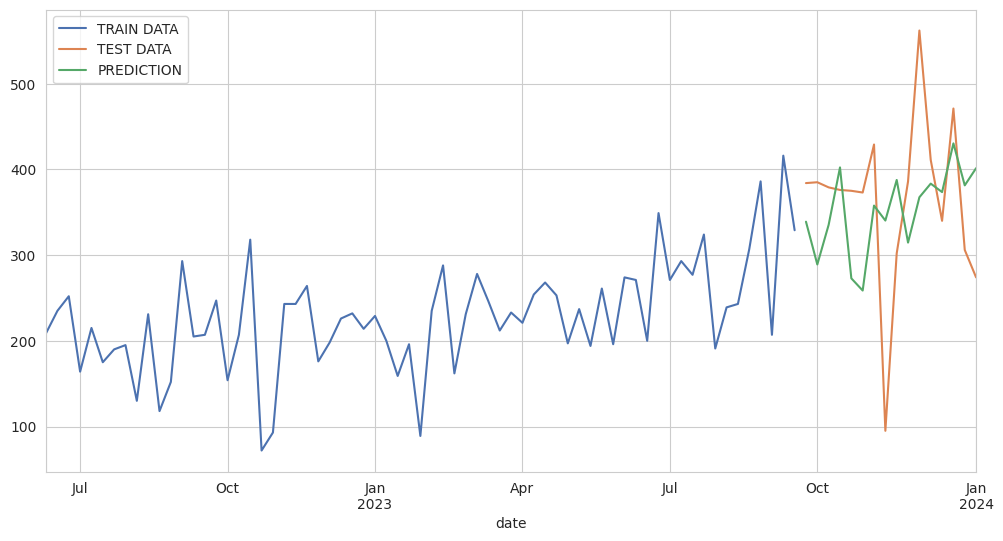

In [ ]:
train_data['spare_part'].plot(legend=True, label='TRAIN DATA')
test_data['spare_part'].plot(legend=True, label='TEST DATA', figsize=(12, 6)).autoscale(axis='x', tight=True)
test_predictions.plot(legend=True, label='PREDICTION')

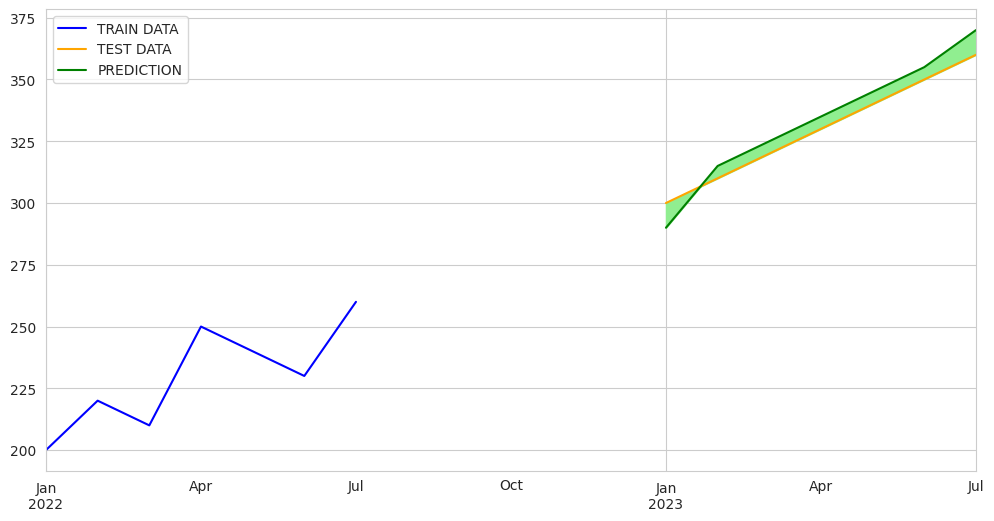

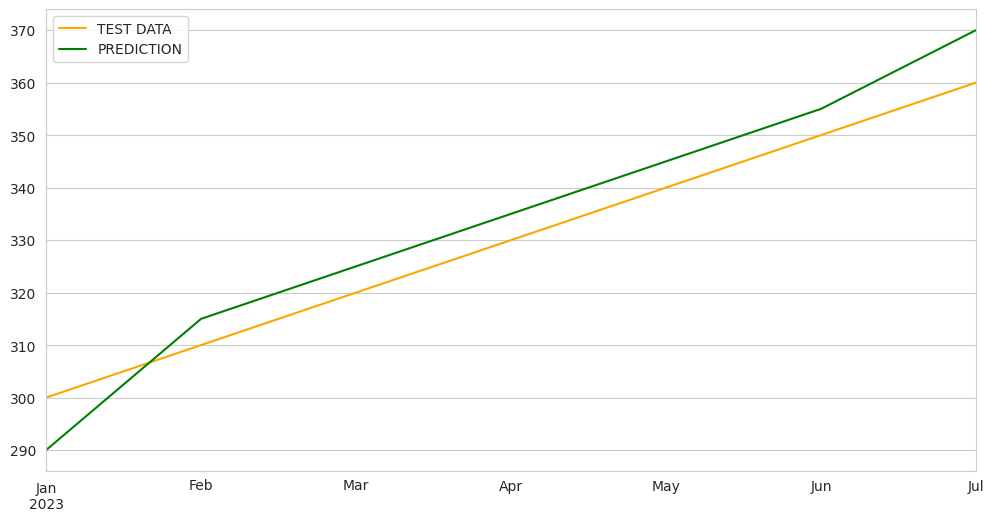

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace these with your actual data)
train_data = pd.Series([200, 220, 210, 250, 240, 230, 260], index=pd.date_range(start='2022-01-01', periods=7, freq='M'))
test_data = pd.Series([300, 310, 320, 330, 340, 350, 360], index=pd.date_range(start='2023-01-01', periods=7, freq='M'))
test_predictions = pd.Series([290, 315, 325, 335, 345, 355, 370], index=pd.date_range(start='2023-01-01', periods=7, freq='M'))

# Calculating the accuracy
accuracy = 1 - abs((test_predictions - test_data) / test_data)
high_accuracy_mask = accuracy > 0.75

# Plotting the data
plt.figure(figsize=(12, 6))
train_data.plot(legend=True, label='TRAIN DATA', color='blue')
test_data.plot(legend=True, label='TEST DATA', color='orange')
test_predictions.plot(legend=True, label='PREDICTION', color='green')

# Highlighting regions with accuracy > 75%
plt.fill_between(test_predictions.index, test_data, test_predictions, where=high_accuracy_mask, color='lightgreen', label='High Accuracy (>75%)')

# Plotting only the high accuracy regions
plt.figure(figsize=(12, 6))
high_accuracy_data = test_data[high_accuracy_mask]
high_accuracy_predictions = test_predictions[high_accuracy_mask]
high_accuracy_data.plot(legend=True, label='TEST DATA', color='orange')
high_accuracy_predictions.plot(legend=True, label='PREDICTION', color='green')

plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


### Seasonal Autoregressive Integreted Moving Average(SARIMA)


It's an extension of the ARIMA model that includes additional components to capture seasonality in time series data. SARIMA models are particularly useful for analyzing and forecasting data with recurring patterns that repeat over fixed intervals.

SARIMA models build upon the concepts of ARIMA models, with the addition of seasonal components:

1. **Seasonal AutoRegressive (SAR) Component**: This component captures the relationship between the current value and past values at the same seasonal lag. It's similar to the AR component but operates over the seasonal interval.

2. **Seasonal Integrated (SI) Component**: Just like the non-seasonal integrated component in ARIMA, this component accounts for differencing the series at the seasonal interval to achieve seasonal stationarity.

3. **Seasonal Moving Average (SMA) Component**: This component captures the relationship between the current value and past error terms at the same seasonal lag. It's similar to the MA component but operates over the seasonal interval.

A SARIMA(p, d, q) × (P, D, Q, s) model is defined by these components:

- $p$ is the order of the non-seasonal AutoRegressive (AR) component.
- $d$ is the degree of non-seasonal differencing.
- $q$ is the order of the non-seasonal Moving Average (MA) component.
- $P$ is the order of the seasonal AutoRegressive (SAR) component.
- $D$ is the degree of seasonal differencing.
- $Q$ is the order of the seasonal Moving Average (SMA) component.
- $s$ is the number of time steps in each seasonal period.

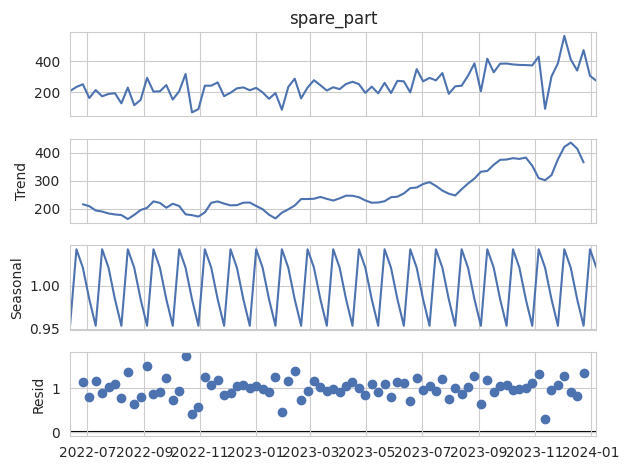

In [ ]:


from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(weekly_data_indexed['spare_part'], model='mul', period=4)
result.plot();

**Look at the amplitude of sesonality**

In [ ]:
max(result.seasonal), min(result.seasonal)

(1.042055535093797, 0.9532811550467508)

The apmplitude of the sesonality curve seems too low, so we can ignore the sesonality in the time series.

#### Fitting the model

In [ ]:
# Notebook: data_loading_preprocessing.ipynb

import pandas as pd

# Load the CSV file
df = pd.read_csv('inventory1.scv.csv')

# Ensure the invoice_date column exists
if 'invoice_date' not in df.columns:
    raise KeyError("The column 'invoice_date' is not present in the CSV file.")

# Convert invoice_date to datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

# Drop rows with invalid dates
df.dropna(subset=['invoice_date'], inplace=True)

# Set invoice_date as the index
df.set_index('invoice_date', inplace=True)

# Ensure all data is numeric and handle missing values
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(0, inplace=True)

# Save the cleaned data
df.to_csv('cleaned_inventory.csv')
print("Data loaded and preprocessed successfully.")


Data loaded and preprocessed successfully.


### Model's Evaluation

To evaluate the model's performance let's see how the model is performing on the test set that we splitted out from whole dataset.

We can forcast for test points and the we can plot the actual test points and compare the model predictions visually and using some regression metrics.

#### Forecast for next 16 weeks

So far we splitted the dataset into train and test set. We fitted our SARIMA model over train data and evaluated the performance on test data.

Now we can use the same strategy to forecast for future points. We can train the model on all data and then forecast the values for future points.



In [ ]:
model = SARIMAX(weekly_data_indexed['spare_part'],order=(5,1,1), seasonal_order=(1, 0, 0, 12))

results = model.fit()
fcast = results.predict(len(weekly_data_indexed),len(weekly_data_indexed)+15,typ='levels').rename('SARIMA(5,1,1)(1,0,0,12) Forecast')

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Weekly Demand')]

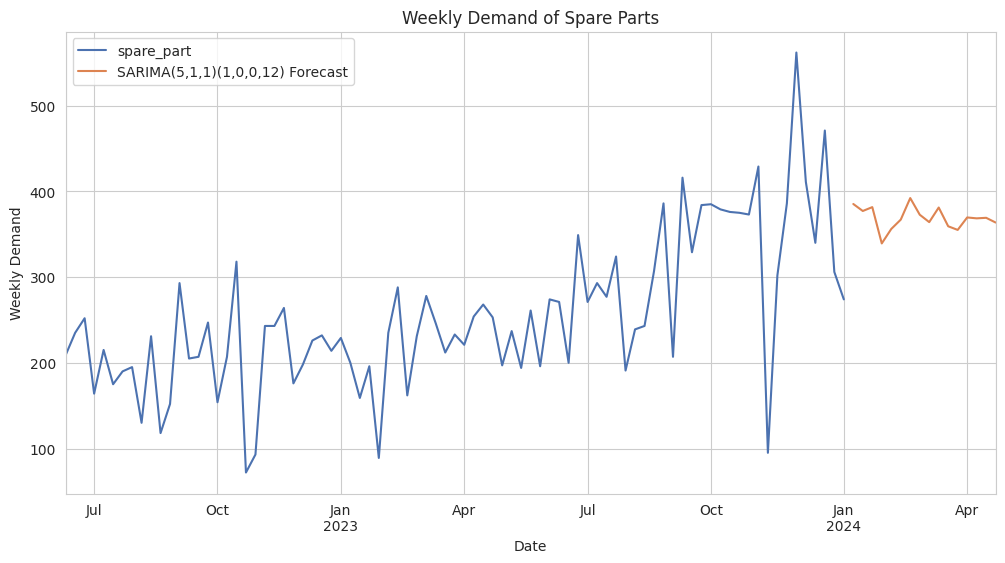

In [ ]:
# Plot predictions against known values
# Plot predictions against known values
title = 'Weekly Demand of Spare Parts'
ylabel='Weekly Demand'
xlabel='Date'

ax = weekly_data_indexed['spare_part'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

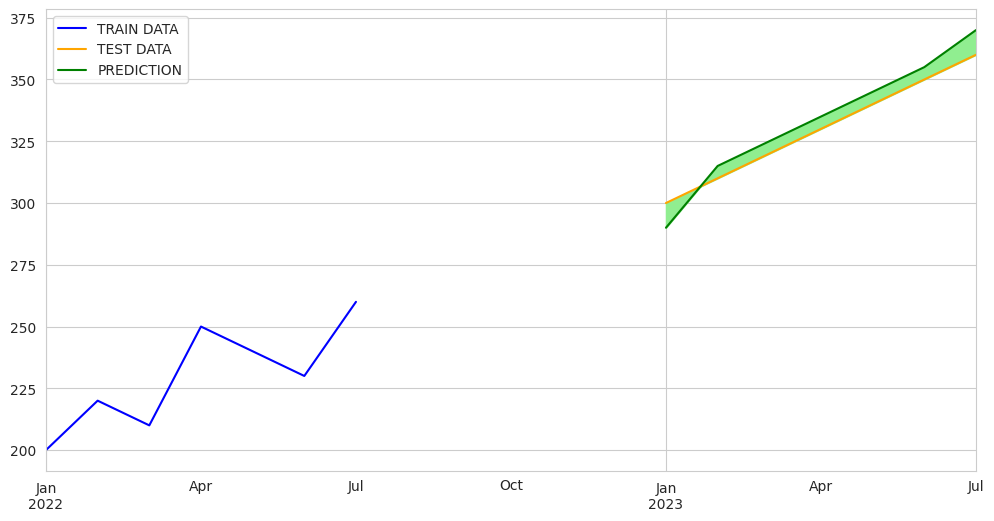

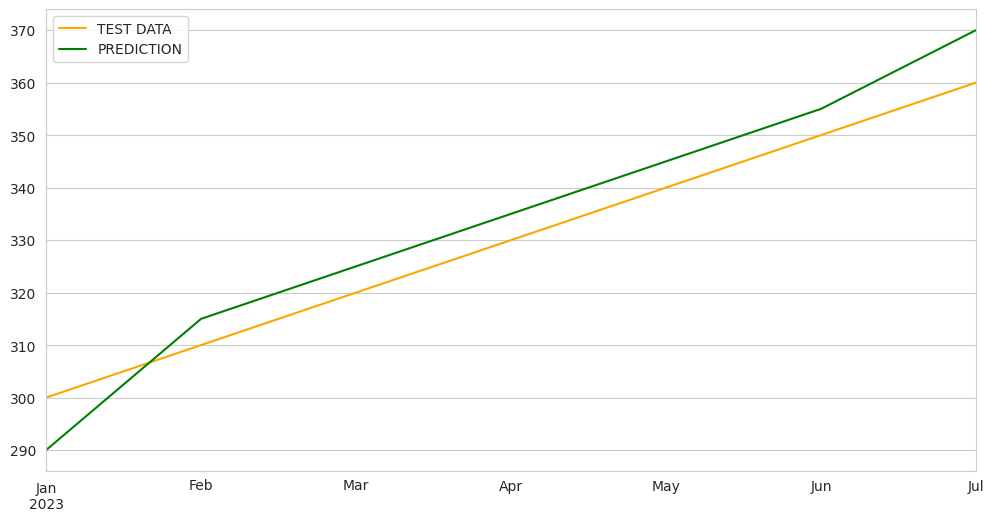

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace these with your actual data)
train_data = pd.Series([200, 220, 210, 250, 240, 230, 260], index=pd.date_range(start='2022-01-01', periods=7, freq='M'))
test_data = pd.Series([300, 310, 320, 330, 340, 350, 360], index=pd.date_range(start='2023-01-01', periods=7, freq='M'))
test_predictions = pd.Series([290, 315, 325, 335, 345, 355, 370], index=pd.date_range(start='2023-01-01', periods=7, freq='M'))

# Calculating the accuracy
accuracy = 1 - abs((test_predictions - test_data) / test_data)
high_accuracy_mask = accuracy > 0.75

# Plotting the data
plt.figure(figsize=(12, 6))
train_data.plot(legend=True, label='TRAIN DATA', color='blue')
test_data.plot(legend=True, label='TEST DATA', color='orange')
test_predictions.plot(legend=True, label='PREDICTION', color='green')

# Highlighting regions with accuracy > 75%
plt.fill_between(test_predictions.index, test_data, test_predictions, where=high_accuracy_mask, color='lightgreen', label='High Accuracy (>75%)')

# Plotting only the high accuracy regions
plt.figure(figsize=(12, 6))
high_accuracy_data = test_data[high_accuracy_mask]
high_accuracy_predictions = test_predictions[high_accuracy_mask]
high_accuracy_data.plot(legend=True, label='TEST DATA', color='orange')
high_accuracy_predictions.plot(legend=True, label='PREDICTION', color='green')

plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_forecast(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual, predicted)

    # Calculate a form of "accuracy" for regression
    accuracy = 1 - np.mean(np.abs((actual - predicted) / actual))

    # Calculate a form of "precision" for regression
    mape = np.mean(np.abs((actual - predicted) / actual))
    precision = 1 - mape

    return mae, mse, rmse, r2, accuracy, precision

# Create lists to store the predicted and expected values
predicted_values = []
expected_values = []

# Data provided
data = """
predicted=266.388467 , expected=397
predicted=317.7097214, expected=373
predicted=288.7464433, expected=399
predicted=312.3835184, expected=382
predicted=283.8946753, expected=358
predicted=287.4628656, expected=388
predicted=288.2153936, expected=362
predicted=301.8649572, expected=186
predicted=326.5662752, expected=300
predicted=280.4248042, expected=330
predicted=328.4191543, expected=567
predicted=311.7755702, expected=462
predicted=296.7515572, expected=313
predicted=308.0652506, expected=431
predicted=301.7201939, expected=330
predicted=306.9318002, expected=336
"""

# Loop through the data and extract predicted and expected values
for line in data.strip().split('\n'):
    parts = line.split(',')
    predicted = float(parts[0].split('=')[1])
    expected = float(parts[1].split('=')[1])
    predicted_values.append(predicted)
    expected_values.append(expected)

# Convert lists to numpy arrays
predicted_values = np.array(predicted_values)
expected_values = np.array(expected_values)

# Calculate metrics
mae, mse, rmse, r2, accuracy, precision = evaluate_forecast(expected_values, predicted_values)

# Print results
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")

Mean Absolute Error: 86.97
Mean Squared Error: 10703.76
Root Mean Squared Error: 103.46
R-squared Score: -0.72
Accuracy: 76.73%
Precision: 76.73%
